TASK 2 - Solution

In [2]:
#imports
#%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

import numpy as np
import pandas as pd
import tensorflow as tf

2022-12-22 11:12:37.238375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# just to make sure everyone get's the same results
random_state = 44
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [4]:
data = pd.DataFrame([[0,0,0],
                    [1,0,1],
                    [0,1,1],
                    [1,1,0]], columns = ['input1', 'input2', 'output'])

In [5]:
init = tf.keras.initializers.he_uniform(4) #uniform variance scaling initializer with a seed of 4

In [23]:
# define model topology
inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(2, name='HiddenLayer', activation=tf.keras.activations.relu, kernel_initializer=init)(inputs)
output = tf.keras.layers.Dense(1, name='OutputLayer', activation = tf.keras.activations.sigmoid, kernel_initializer=init)(x)

In [24]:
# create model
model = tf.keras.Model(inputs = inputs, outputs = output, name='TF_Example')

# inspect model
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

learning_rate = 0.2

model.compile(loss = tf.keras.losses.MeanSquaredError(),
             optimizer = tf.keras.optimizers.Adam(learning_rate),
             metrics = [tf.keras.metrics.RootMeanSquaredError()])

Model: "TF_Example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 HiddenLayer (Dense)         (None, 2)                 6         
                                                                 
 OutputLayer (Dense)         (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(data[['input1', 'input2']].to_numpy(), data['output'].to_numpy(), batch_size=5, epochs=120)

Epoch 1/120
1/1 [==============================] - 0s 223ms/step - loss: 0.3093 - root_mean_squared_error: 0.5562
Epoch 2/120
1/1 [==============================] - 0s 11ms/step - loss: 0.3095 - root_mean_squared_error: 0.5564
Epoch 3/120
1/1 [==============================] - 0s 7ms/step - loss: 0.2717 - root_mean_squared_error: 0.5212
Epoch 4/120
1/1 [==============================] - 0s 15ms/step - loss: 0.2479 - root_mean_squared_error: 0.4979
Epoch 5/120
1/1 [==============================] - 0s 23ms/step - loss: 0.2467 - root_mean_squared_error: 0.4967
Epoch 6/120
1/1 [==============================] - 0s 14ms/step - loss: 0.2423 - root_mean_squared_error: 0.4922
Epoch 7/120
1/1 [==============================] - 0s 10ms/step - loss: 0.2236 - root_mean_squared_error: 0.4729
Epoch 8/120
1/1 [==============================] - 0s 8ms/step - loss: 0.2035 - root_mean_squared_error: 0.4511
Epoch 9/120
1/1 [==============================] - 0s 6ms/step - loss: 0.1961 - root_mean_squared

<AxesSubplot: >

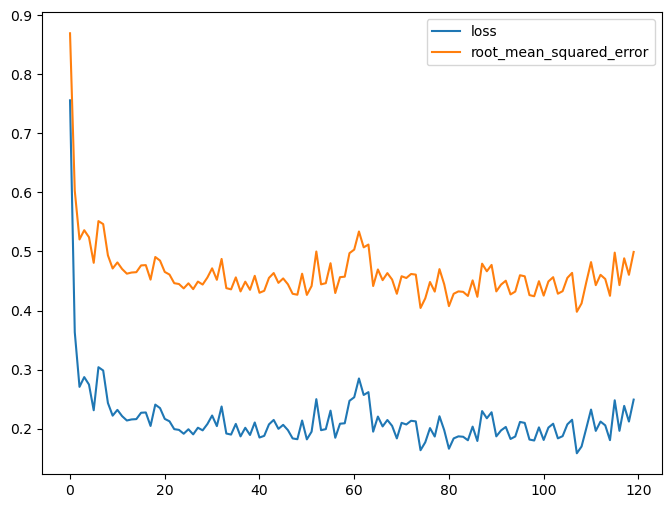

In [16]:
pd.DataFrame(history.history).plot()

In [ ]:
test_data = data[['input1', 'input2']]

In [ ]:
test_data['pred'] = model.predict(test_data)

In [ ]:
display(test_data)